Homework Assignment 3

In [96]:
grocery_data_path= r'C:\Users\injam\Downloads\Grocery_Items_25.csv'

In [97]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

data= pd.read_csv(grocery_data_path)

# Drop any columns with NaN values
g_df = [row.dropna().tolist() for index, row in data.iterrows()]

# Convert the DataFrame into a transaction format using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(grocery_df).transform(grocery_df)

df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Using minimum support = 0.01 and minimum confidence threshold = 0.1, what are the association rules you can extract from your dataset?

In [98]:
from mlxtend.frequent_patterns import apriori,association_rules

items = apriori(df, min_support=0.01, use_colnames=True)
association_rules(items, metric="confidence", min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(soda),(other vegetables),0.103125,0.122000,0.010625,0.103030,0.844511,-0.001956,0.978851,-0.170323
1,(other vegetables),(whole milk),0.122000,0.154625,0.014250,0.116803,0.755397,-0.004614,0.957176,-0.269433
2,(rolls/buns),(whole milk),0.109625,0.154625,0.012750,0.116306,0.752178,-0.004201,0.956637,-0.270093
3,(soda),(whole milk),0.103125,0.154625,0.011875,0.115152,0.744715,-0.004071,0.955390,-0.276522
4,(yogurt),(whole milk),0.088125,0.154625,0.011375,0.129078,0.834781,-0.002251,0.970667,-0.178338


Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct):
 0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules extracted from
 the dataset. Construct a heatmap using Seaborn data visualization library (https://seaborn.
 pydata.org/generated/seaborn.heatmap.html) to show the count results such that the x
axis is msv and the y-axis is mct.

     msv    mct  count
0  0.001  0.050    503
1  0.001  0.075    306
2  0.001  0.100    150
3  0.005  0.050     61
4  0.005  0.075     45
5  0.005  0.100     24
6  0.010  0.050     10
7  0.010  0.075      9
8  0.010  0.100      5


<Axes: xlabel='msv', ylabel='mct'>

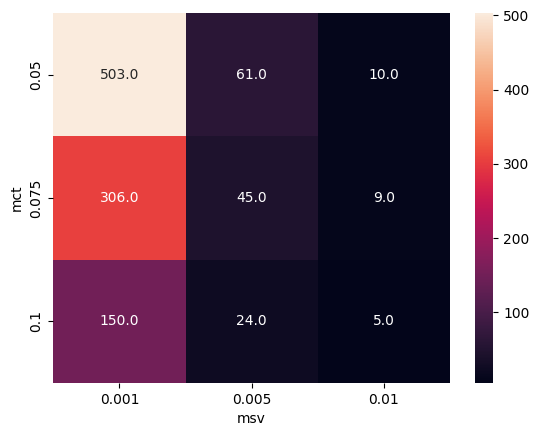

In [108]:
import seaborn as sns
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

minimum_support_values = [0.001, 0.005, 0.01]
minimum_confidence_threshold = [0.05, 0.075, 0.1]

heatmap_data = pd.DataFrame({
    'msv': [i for i in minimum_support_values for _ in minimum_confidence_threshold],
    'mct': minimum_confidence_threshold * len(minimum_support_values),
    'count': [len(association_rules(apriori(df, min_support=i, use_colnames=True), metric="confidence", min_threshold=j)) 
              for i in minimum_support_values for j in minimum_confidence_threshold]
})
print(heatmap_data)
heatmap_data = heatmap_data.pivot(index="mct", columns="msv", values="count")
sns.heatmap(heatmap_data, annot=True, fmt=".1f")


Split the dataset into 50:50 (i.e., 2 equal subsets) and extract association rules for each data subset
 for minimum support = 0.005 and minimum confident threshold = 0.075. Show the association
 rules for both sets. Which association rules appeared in both sets (note that there could be none)?

In [99]:
set1 = df.iloc[:len(df)//2]
set2 = df.iloc[len(df)//2:]

items = apriori(set1, min_support=0.005, use_colnames=True)
r_1 = association_rules(items, metric="confidence", min_threshold=0.075)

items = apriori(set2, min_support=0.005, use_colnames=True)
r_2 = association_rules(items, metric="confidence", min_threshold=0.075)
common_rules = pd.merge(rules1, rules2,on=['antecedents', 'consequents'])


In [100]:
r_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(other vegetables),0.04600,0.12175,0.00550,0.119565,0.982055,-0.000100,0.997519,-0.018794
1,(bottled beer),(rolls/buns),0.04600,0.11325,0.00575,0.125000,1.103753,0.000541,1.013429,0.098532
2,(bottled beer),(whole milk),0.04600,0.15150,0.00750,0.163043,1.076195,0.000531,1.013792,0.074214
3,(bottled water),(rolls/buns),0.06075,0.11325,0.00575,0.094650,0.835763,-0.001130,0.979456,-0.173021
4,(bottled water),(soda),0.06075,0.10950,0.00550,0.090535,0.826803,-0.001152,0.979147,-0.182356
5,(bottled water),(whole milk),0.06075,0.15150,0.00575,0.094650,0.624754,-0.003454,0.937207,-0.390050
6,(citrus fruit),(whole milk),0.05625,0.15150,0.00750,0.133333,0.880088,-0.001022,0.979038,-0.126157
7,(citrus fruit),(yogurt),0.05625,0.09000,0.00575,0.102222,1.135802,0.000687,1.013614,0.126692
8,(frankfurter),(other vegetables),0.03600,0.12175,0.00525,0.145833,1.197810,0.000867,1.028195,0.171310
9,(frankfurter),(whole milk),0.03600,0.15150,0.00525,0.145833,0.962596,-0.000204,0.993366,-0.038746


In [101]:
r_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(whole milk),0.03475,0.15775,0.00525,0.151079,0.957712,-0.000232,0.992142,-0.043743
1,(bottled beer),(other vegetables),0.04400,0.12225,0.00500,0.113636,0.929541,-0.000379,0.990282,-0.073464
2,(bottled beer),(whole milk),0.04400,0.15775,0.00550,0.125000,0.792393,-0.001441,0.962571,-0.215107
3,(bottled water),(other vegetables),0.06050,0.12225,0.00625,0.103306,0.845037,-0.001146,0.978873,-0.163312
4,(bottled water),(soda),0.06050,0.09675,0.00525,0.086777,0.896918,-0.000603,0.989079,-0.108996
5,(bottled water),(whole milk),0.06050,0.15775,0.00825,0.136364,0.864429,-0.001294,0.975237,-0.143053
6,(butter),(whole milk),0.03500,0.15775,0.00525,0.150000,0.950872,-0.000271,0.990882,-0.050820
7,(canned beer),(whole milk),0.05075,0.15775,0.00625,0.123153,0.780683,-0.001756,0.960544,-0.228365
8,(canned beer),(yogurt),0.05075,0.08625,0.00500,0.098522,1.142286,0.000623,1.013613,0.131222
9,(citrus fruit),(other vegetables),0.05325,0.12225,0.00525,0.098592,0.806475,-0.001260,0.973754,-0.202209


In [102]:
common_rules

,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,zhangs_metric_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y,zhangs_metric_y
0,(bottled beer),(other vegetables),0.04600,0.12175,0.00550,0.119565,0.982055,-0.000100,0.997519,-0.018794,0.04400,0.12225,0.00500,0.113636,0.929541,-0.000379,0.990282,-0.073464
1,(bottled beer),(whole milk),0.04600,0.15150,0.00750,0.163043,1.076195,0.000531,1.013792,0.074214,0.04400,0.15775,0.00550,0.125000,0.792393,-0.001441,0.962571,-0.215107
2,(bottled water),(soda),0.06075,0.10950,0.00550,0.090535,0.826803,-0.001152,0.979147,-0.182356,0.06050,0.09675,0.00525,0.086777,0.896918,-0.000603,0.989079,-0.108996
3,(bottled water),(whole milk),0.06075,0.15150,0.00575,0.094650,0.624754,-0.003454,0.937207,-0.390050,0.06050,0.15775,0.00825,0.136364,0.864429,-0.001294,0.975237,-0.143053
4,(citrus fruit),(whole milk),0.05625,0.15150,0.00750,0.133333,0.880088,-0.001022,0.979038,-0.126157,0.05325,0.15775,0.00675,0.126761,0.803553,-0.001650,0.964512,-0.205228
5,(citrus fruit),(yogurt),0.05625,0.09000,0.00575,0.102222,1.135802,0.000687,1.013614,0.126692,0.05325,0.08625,0.00525,0.098592,1.143090,0.000657,1.013691,0.132219
6,(frankfurter),(other vegetables),0.03600,0.12175,0.00525,0.145833,1.197810,0.000867,1.028195,0.171310,0.03900,0.12225,0.00550,0.141026,1.153584,0.000732,1.021858,0.138539
7,(newspapers),(whole milk),0.04125,0.15150,0.00675,0.163636,1.080108,0.000501,1.014511,0.077358,0.03725,0.15775,0.00550,0.147651,0.935981,-0.000376,0.988152,-0.066332
8,(pip fruit),(other vegetables),0.04550,0.12175,0.00600,0.131868,1.083106,0.000460,1.011655,0.080387,0.04675,0.12225,0.00500,0.106952,0.874862,-0.000715,0.982870,-0.130474
9,(rolls/buns),(other vegetables),0.11325,0.12175,0.00975,0.086093,0.707127,-0.004038,0.960984,-0.318369,0.10600,0.12225,0.01000,0.094340,0.771694,-0.002958,0.969182,-0.248645


## ImageClassification using CNN

In [109]:
directory = r'C:\Users\injam\Desktop\DM_Assignment_1\Cropped'

Epoch 1/20
20/20 [==============================] - 5s 131ms/step - loss: 1.9130 - accuracy: 0.2787 - val_loss: 1.3715 - val_accuracy: 0.1830
Epoch 2/20
20/20 [==============================] - 2s 103ms/step - loss: 1.3300 - accuracy: 0.2328 - val_loss: 1.3285 - val_accuracy: 0.1830
Epoch 3/20
20/20 [==============================] - 2s 101ms/step - loss: 1.2720 - accuracy: 0.3230 - val_loss: 1.3705 - val_accuracy: 0.3007
Epoch 4/20
20/20 [==============================] - 2s 100ms/step - loss: 1.2553 - accuracy: 0.3934 - val_loss: 1.2988 - val_accuracy: 0.4641
Epoch 5/20
20/20 [==============================] - 2s 102ms/step - loss: 1.2144 - accuracy: 0.4525 - val_loss: 1.2759 - val_accuracy: 0.4183
Epoch 6/20
20/20 [==============================] - 2s 100ms/step - loss: 1.1868 - accuracy: 0.4574 - val_loss: 1.2758 - val_accuracy: 0.4118
Epoch 7/20
20/20 [==============================] - 2s 104ms/step - loss: 1.1726 - accuracy: 0.4590 - val_loss: 1.2421 - val_accuracy: 0.4444
Epoch 

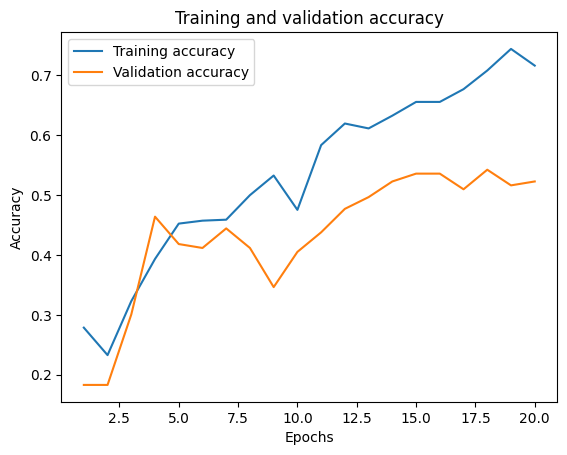

In [110]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

directory1 = r'C:\Users\injam\Desktop\DM_Assignment_1\Cropped\n02093647-Bedlington_terrier'
directory2 = r'C:\Users\injam\Desktop\DM_Assignment_1\Cropped\n02099849-Chesapeake_Bay_retriever'
directory3 = r'C:\Users\injam\Desktop\DM_Assignment_1\Cropped\n02100735-English_setter'
directory4 = r'C:\Users\injam\Desktop\DM_Assignment_1\Cropped\n02116738-African_hunting_dog'

image_height, image_width = 128, 128

def plot_training_curves(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(train_accuracy) + 1)
    plt.plot(epochs, train_accuracy, label='Training accuracy')
    plt.plot(epochs, val_accuracy, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def load_images_and_labels(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = load_img(os.path.join(folder, filename), target_size=(image_height, image_width))
            img_array = img_to_array(img)
            images.append(img_array)
            if folder == directory1:
                labels.append(0)
            elif folder == directory2:
                labels.append(1)
            elif folder == directory3:
                labels.append(2)
            elif folder == directory4:
                labels.append(3)
    return images, labels

class1_images, class1_labels = load_images_and_labels(directory1)
class2_images, class2_labels = load_images_and_labels(directory2)
class3_images, class3_labels = load_images_and_labels(directory3)
class4_images, class4_labels = load_images_and_labels(directory4)

images = np.concatenate([class1_images, class2_images, class3_images, class4_images], axis=0)
labels = np.concatenate([class1_labels, class2_labels, class3_labels, class4_labels], axis=0)

labels = to_categorical(labels)

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_val = X_val / 255.0

model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
plot_training_curves(history)


Train the CNN using 2 other number of nodes in the hidden layer (iv): 8 and 32 with all other
 parameters unchanged

Epoch 1/20
20/20 [==============================] - 7s 129ms/step - loss: 1.4112 - accuracy: 0.2918 - val_loss: 1.2944 - val_accuracy: 0.3072
Epoch 2/20
20/20 [==============================] - 2s 102ms/step - loss: 1.2222 - accuracy: 0.4098 - val_loss: 1.1892 - val_accuracy: 0.4510
Epoch 3/20
20/20 [==============================] - 2s 104ms/step - loss: 1.0784 - accuracy: 0.5410 - val_loss: 1.1812 - val_accuracy: 0.4837
Epoch 4/20
20/20 [==============================] - 2s 102ms/step - loss: 0.9959 - accuracy: 0.5705 - val_loss: 1.1083 - val_accuracy: 0.4837
Epoch 5/20
20/20 [==============================] - 2s 103ms/step - loss: 0.8901 - accuracy: 0.6328 - val_loss: 1.1368 - val_accuracy: 0.5163
Epoch 6/20
20/20 [==============================] - 2s 109ms/step - loss: 0.8231 - accuracy: 0.6967 - val_loss: 1.0816 - val_accuracy: 0.5686
Epoch 7/20
20/20 [==============================] - 2s 123ms/step - loss: 0.7430 - accuracy: 0.7279 - val_loss: 1.0766 - val_accuracy: 0.5882
Epoch 

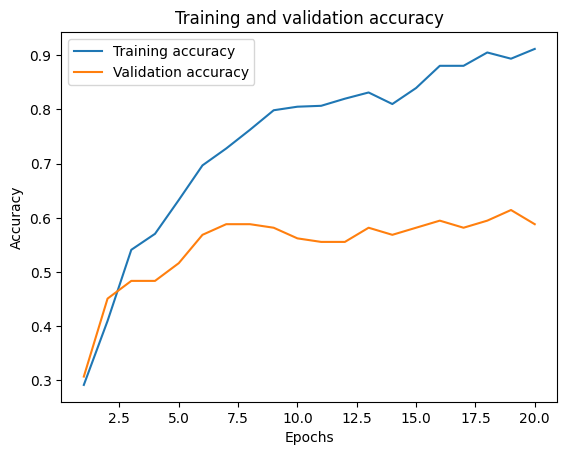

In [112]:
updated_model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
])

updated_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

training_history = updated_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
plot_training_curves(training_history)


Epoch 1/20
20/20 [==============================] - 4s 130ms/step - loss: 2.1129 - accuracy: 0.2590 - val_loss: 1.3282 - val_accuracy: 0.4183
Epoch 2/20
20/20 [==============================] - 2s 119ms/step - loss: 1.2537 - accuracy: 0.3902 - val_loss: 1.3368 - val_accuracy: 0.3529
Epoch 3/20
20/20 [==============================] - 2s 110ms/step - loss: 1.0434 - accuracy: 0.5475 - val_loss: 1.1303 - val_accuracy: 0.5556
Epoch 4/20
20/20 [==============================] - 2s 109ms/step - loss: 0.8145 - accuracy: 0.6852 - val_loss: 1.0848 - val_accuracy: 0.4837
Epoch 5/20
20/20 [==============================] - 2s 108ms/step - loss: 0.6071 - accuracy: 0.8033 - val_loss: 1.2476 - val_accuracy: 0.4314
Epoch 6/20
20/20 [==============================] - 2s 109ms/step - loss: 0.5809 - accuracy: 0.7885 - val_loss: 0.9998 - val_accuracy: 0.5752
Epoch 7/20
20/20 [==============================] - 2s 116ms/step - loss: 0.4411 - accuracy: 0.8820 - val_loss: 1.0405 - val_accuracy: 0.5817
Epoch 

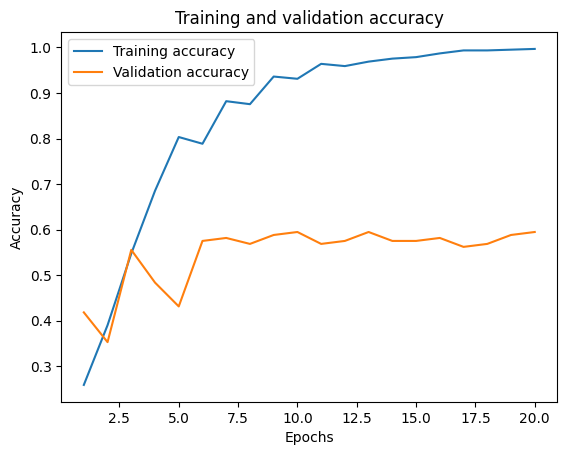

In [106]:
updated_model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

updated_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

training_history = updated_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
plot_training_curves(training_history)
